## Import libraries and read the file

In [1]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the census data
df = pd.read_csv('census_03_clean.csv')

## Study the dataset

In [3]:
#Check the number of rows and columns
df.shape

(10083, 12)

In [4]:
# print out the first five rows to have an overview of the dataset
df.head()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Gray Centers,Rita,Owen,50,Head,Single,Female,Employed,No Infirmities,Church of England
1,1,2,Gray Centers,Amber,James,21,Head,Single,Female,University Student,No Infirmities,Muslim
2,2,3,Gray Centers,Oliver,Campbell,58,Head,Married,Male,Employed,No Infirmities,Church of England
3,3,3,Gray Centers,Christine,Campbell,50,Wife,Married,Female,Employed,No Infirmities,No Religion
4,4,4,Gray Centers,Gordon,Miles,79,Head,Widowed,Male,Retired,No Infirmities,Church of England


In [5]:
# Displays the data type, non null count and number of data entry
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10083 entries, 0 to 10082
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10083 non-null  int64 
 1   House Number                   10083 non-null  int64 
 2   Street                         10083 non-null  object
 3   First Name                     10083 non-null  object
 4   Surname                        10083 non-null  object
 5   Age                            10083 non-null  int64 
 6   Relationship to Head of House  10083 non-null  object
 7   Marital Status                 10083 non-null  object
 8   Gender                         10083 non-null  object
 9   Occupation                     10083 non-null  object
 10  Infirmity                      10083 non-null  object
 11  Religion                       10083 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.4+ KB


### Total Population

In [6]:
# Calculate the total population
total_population = df.shape[0]

print(f'The total population is {total_population:,}')

The total population is 10,083


In [7]:
len(df)

10083

## Age

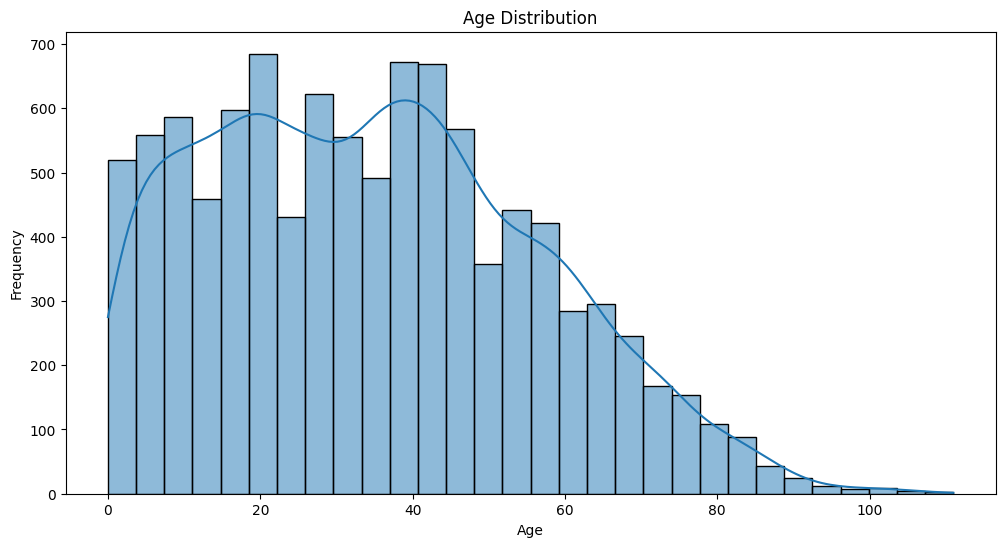

In [8]:
# Plot histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Histogram Distribution of Age.png', dpi=300)
plt.show()

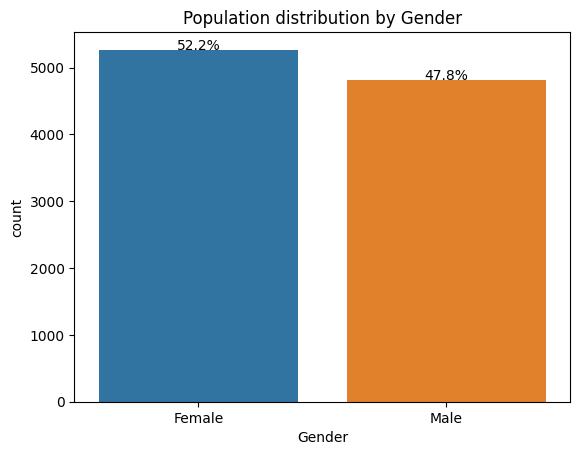

In [9]:
gender_plot = sns.countplot(data=df, x='Gender')
 
# Calculate the total count of gender

total_frequency = len(df['Gender'])
 
# Loop through each bar in the plot

for p in gender_plot.patches:

    # Get the percentage value for the bar

    percentage = p.get_height() / total_frequency * 100

    # Add the percentage as text above the bar

    gender_plot.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10)
 # Give the plot a title and name the x-axis

gender_plot.set_title('Population distribution by Gender')

gender_plot.set_xlabel('Gender')
plt.savefig('Population Distribution By Gender.png', dpi=300, bbox_inches='tight')

In [10]:
def group_by_age(column, df):
 
    '''A function to group categorical data by age, creating age bands and counting the corresponding row values.
 
       The function takes the column to be counted by age group and the DataFrame as parameters.'''
 
    age_groups = [i for i in range(4, df['Age'].max() + 5, 5)]  # Creating age bands
 
    category = df[column].unique().tolist()  # Extracting categorical headers
 
    data_ = []
 
    for age in age_groups:
 
        subset = df[(df['Age'] >= age - 4) & (df['Age'] <= age)]
 
        data_list = [f'{age - 4}-{age}'] + [len(subset[subset[column] == c]) for c in category]
 
        data_.append(data_list)
 
    columns = ['Age Range'] + category
 
    age_df = pd.DataFrame(data_, columns=columns)  # Converting to DataFrame.
 
    return age_df

In [11]:
# grouping gender count by age bands
age_df = group_by_age('Gender', df)

In [12]:
# display age-gender dataframe
age_df 

,Age Range,Female,Male
0,0-4,314,333
1,5-9,362,359
2,10-14,376,379
3,15-19,395,393
4,20-24,399,378
5,25-29,409,363
6,30-34,391,324
7,35-39,475,374
8,40-44,450,374
9,45-49,365,333


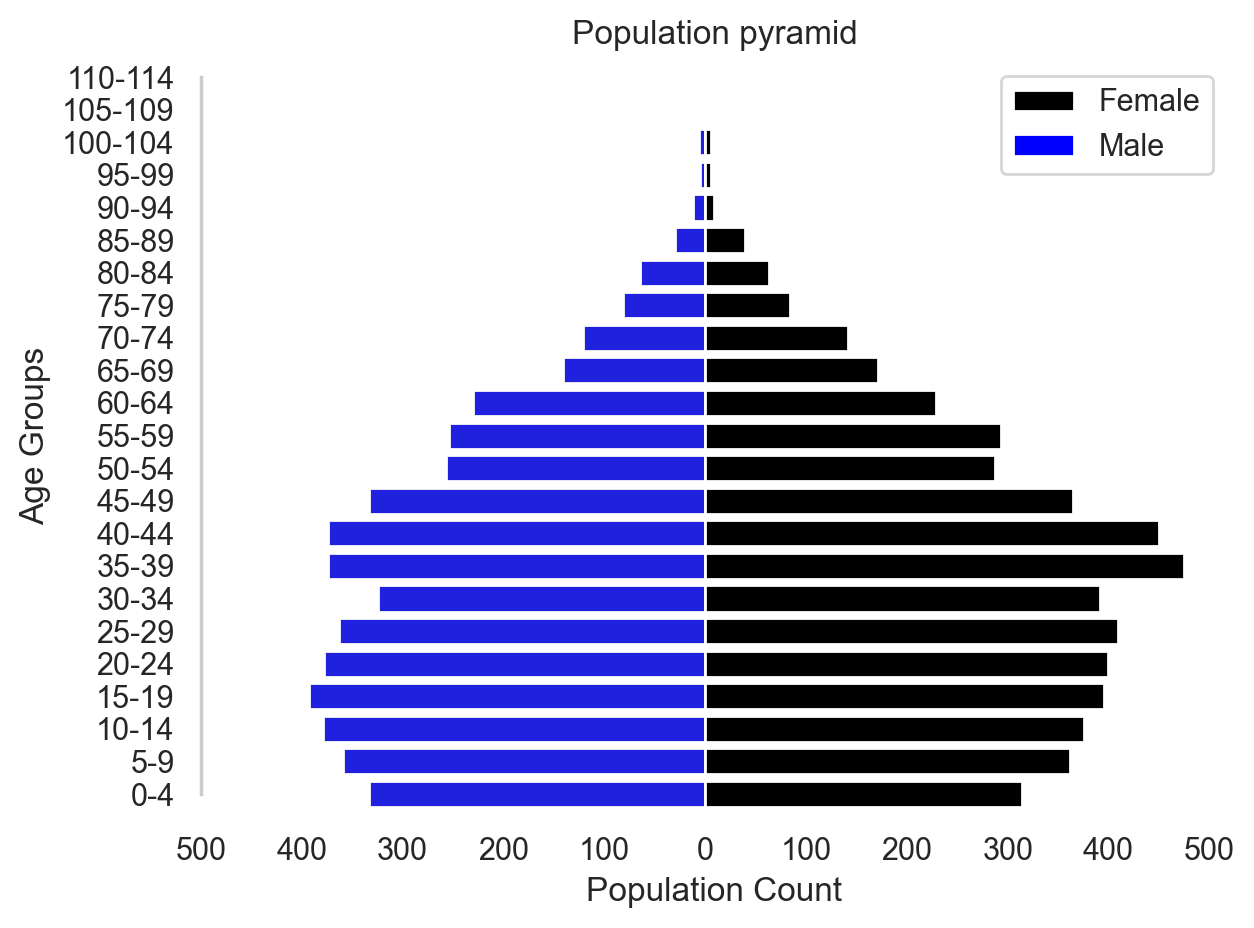

In [13]:
# Plotting a population pyramid 

from matplotlib.patches import Patch

sns.set(style="whitegrid")

plt.figure(dpi=200)

population_pyramid = sns.barplot(x=age_df['Male']*-1, 
                                 y='Age Range', 
                                 data=age_df, 
                                 order=age_df['Age Range'][::-1], 
                                 color="blue"
                                )

population_pyramid = sns.barplot(x='Female', 
                                 y='Age Range', 
                                 data=age_df, 
                                 order=age_df['Age Range'][::-1], 
                                 color="black"
                                )


plt.title("Population pyramid")
plt.xlabel("Population Count")
plt.ylabel("Age Groups")
gender_color = {'Female': 'black', 'Male': 'blue'}
legend_elements = [Patch(facecolor=gender_color[gen], label=gen) for gen in gender_color]
plt.legend(handles=legend_elements)
plt.grid()
plt.tight_layout()
sns.despine(trim = True, bottom = True)
plt.grid(False)
plt.xticks([-500,-400,-300,-200,-100,0,100,200,300,400,500], [500,400,300,200,100,0,100,200,300,400,500])
plt.savefig('Population Pyramid.png', dpi=300, bbox_inches='tight')
plt.show()


In [14]:
# Define age group intervals
age_bins = [0, 17, 64, 150]  # Adjust as needed
age_labels = ['Young Population (0-17)', 'Working-Age_(18-64)', 'Elderly (65 and above)']

# Create 'Age Group' column
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

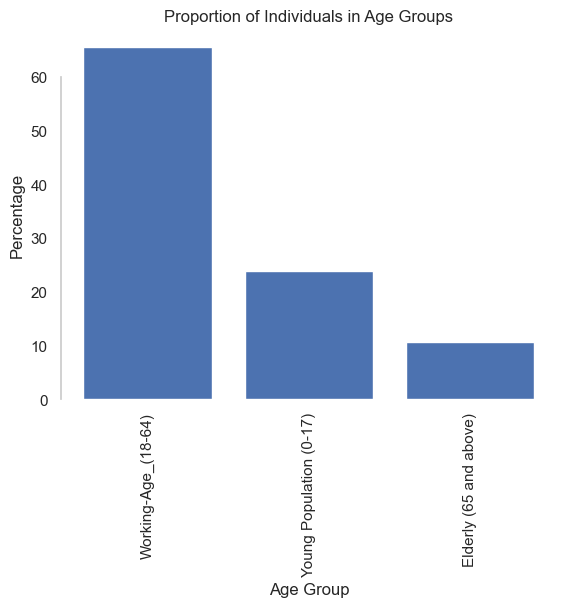

In [15]:
# Calculate proportions
age_group_proportions = df['Age Group'].value_counts(normalize=True) * 100

# Plot the proportions
plt.bar(age_group_proportions.index, age_group_proportions.values)
plt.title('Proportion of Individuals in Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.savefig('Distribution of Age by groups.png', dpi=300, bbox_inches='tight')
plt.xticks(rotation = 'vertical', ha = 'center')
sns.despine(trim = True, bottom = True)
plt.grid(False)
plt.show()

In [16]:
 df['Age Group'].value_counts()

Working-Age_(18-64)        6605
Young Population (0-17)    2408
Elderly (65 and above)     1070
Name: Age Group, dtype: int64

In [17]:
dependecy_ratio = (2408 + 1070)/6605

In [18]:
dependecy_ratio

0.5265707797123391

### MARITAL STATUS

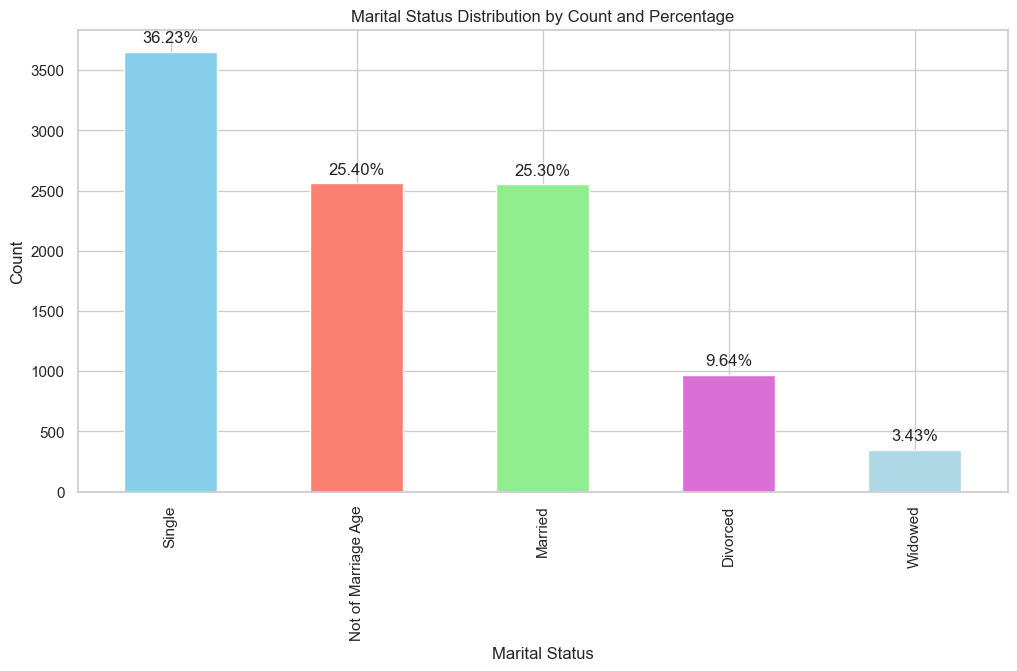

In [19]:
# Count the occurrences of each marital status
marital_status_counts =df['Marital Status'].value_counts()
 
# Calculate the percentage of individuals in each marital status
marital_status_percentages = (marital_status_counts / len(df)) * 100
 
# Define colors for each marital status category
colors = ['skyblue', 'salmon', 'lightgreen', 'orchid', 'lightblue']
 
# Plot the graph with specified colors
plt.figure(figsize=(12, 6))
ax = marital_status_counts.plot(kind='bar', color=colors)
plt.title('Marital Status Distribution by Count and Percentage')
plt.xlabel('Marital Status')
plt.ylabel('Count')
 
# Annotate the percentages on the bars
for p in ax.patches:
    percentage = (p.get_height() / len(df)) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.show()

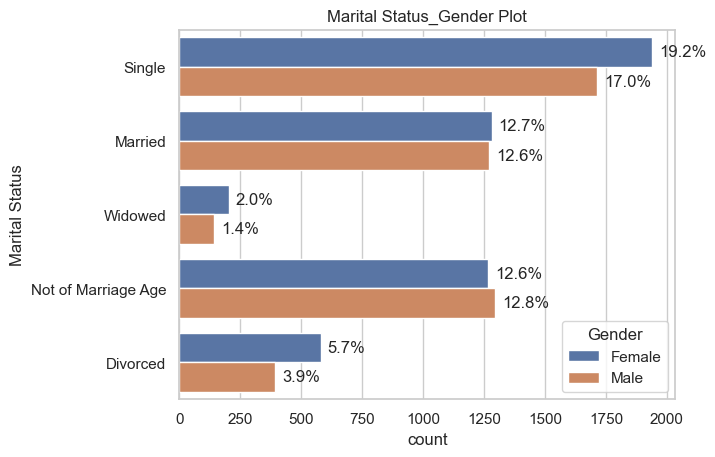

In [20]:
# Create a plot for the Gender column
marital_plot = sns.countplot(data=df, y='Marital Status', hue='Gender')

# Get the total frequency of each category
total_frequency = len(df['Marital Status'])

# Loop through each bar in the plot
for p in marital_plot.patches:
    # Get the percentage value for the bar
    percentage = p.get_width() / total_frequency * 100
    
    # Add the percentage as text next to the bar
    marital_plot.annotate(f'{percentage:.1f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), xytext=(5, 0), textcoords='offset points', va='center')

# Rotate the y-axis label
marital_plot.set_yticklabels(marital_plot.get_yticklabels(), rotation=0)

# Give the plot a title and name the y-axis
marital_plot.set(title='Marital Status_Gender Plot')
marital_plot.set_ylabel('Marital Status')
plt.savefig('Marital Status by Gender.png', dpi=300)
plt.show()

### Divorce Rate

In [21]:
# create a variable for married people 
Divorced = df[df['Marital Status'] == 'Divorced']['Marital Status'].count()

# Calculate divorce rate against the total population
divorce_rate = (Divorced/total_population)*100

# Print the result
print(f'The Divorce rate is {divorce_rate:.2f}%')

The Divorce rate is 9.64%


### Marriage Rate

In [22]:
# create a variable for married people 
married = df[df['Marital Status'] == 'Married']['Marital Status'].count()

# Calculate divorce rate against the total population
married_rate = (married/total_population)*100

# Print the resultbirth
print(f'The marriage rate is {married_rate:.2f}%')

The marriage rate is 25.30%


## OCCUPATION

In [23]:
occupations = df['Occupation'].unique()

In [24]:
occupations

array(['Employed', 'University Student', 'Retired', 'Student', 'Child',
       'Unemployed'], dtype=object)

In [25]:
occupation_distribution = df['Occupation'].value_counts()

In [26]:
occupation_distribution.Employed

5313

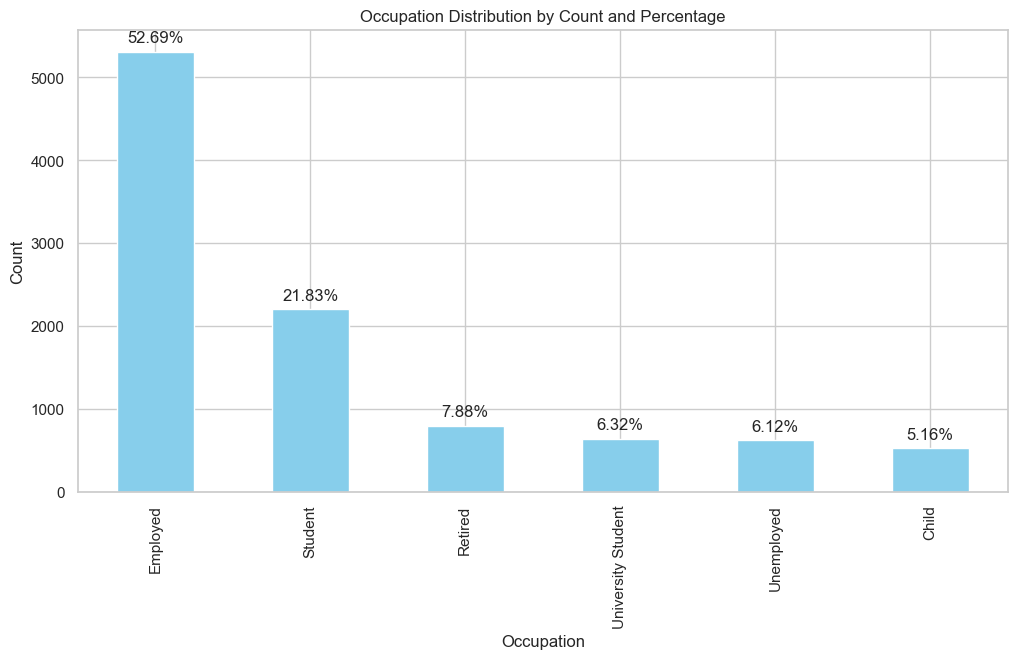

In [27]:
# Count the occurrences of each occupation
occupation_counts = df['Occupation'].value_counts()
 
# Calculate the percentage of individuals in each occupation
occupation_percentages = (occupation_counts / len(df)) * 100
 
# Plot the graph
plt.figure(figsize=(12, 6))
ax = occupation_counts.plot(kind='bar', color='skyblue')
plt.title('Occupation Distribution by Count and Percentage')
plt.xlabel('Occupation')
plt.ylabel('Count')
 
# Annotate the percentages on the bars
for p in ax.patches:
    percentage = (p.get_height() / len(df)) * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

Employment rates are defined as a measure of the extent to which available labour resources (people available to work) are being used. They are calculated as the ratio of the employed to the working age population.

#### Employment rate

In [28]:
Employed = occupation_distribution.Employed
Labour_Force = (occupation_distribution.Employed) + (occupation_distribution.Unemployed)

In [29]:
Employment_rate = (Employed/Labour_Force)*100
print('The Employment rate is:',  Employment_rate, 'Percent')

The Employment rate is: 89.59527824620574 Percent


#### Unemployment rate

The unemployment rate represents the number of unemployed people as a percentage of the labor force (the labor force is the sum of the employed and unemployed). The unemployment rate is calculated as: (Unemployed ÷ Labor Force) x 100

In [30]:
Unemployed = occupation_distribution.Unemployed
Labour_Force = (occupation_distribution.Employed) + (occupation_distribution.Unemployed)

In [31]:
Unemployment_rate = (Unemployed/Labour_Force)*100
print('The Unemployment rate is:',  Unemployment_rate, 'Percent')

The Unemployment rate is: 10.404721753794266 Percent


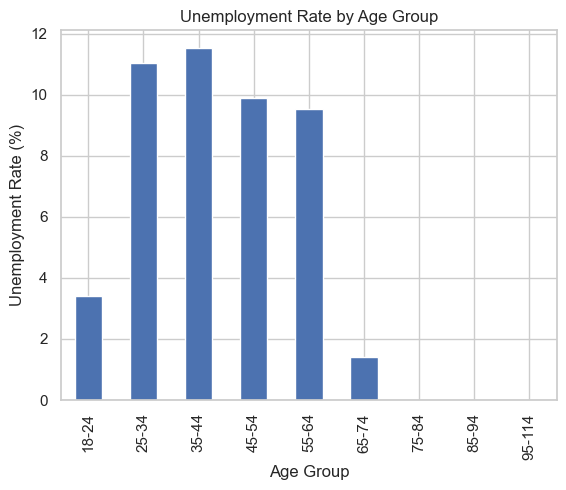

In [32]:
df['Age Group'] = pd.cut(df['Age'], bins=[18, 24, 34, 44, 54, 64, 74, 84, 94, 114], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94', '95-114'])
# Assuming 'Employment Status' column contains employment information
unemployed_df = df[df['Occupation'] == 'Unemployed']
 
# Calculate the number of unemployed individuals in each age group
unemployed_by_age = unemployed_df.groupby('Age Group').size()
 
# Calculate the total population in each age group
total_population_by_age = df.groupby('Age Group').size()
 
# Calculate the unemployment rate for each age group
unemployment_rate_by_age = (unemployed_by_age / total_population_by_age) * 100
import matplotlib.pyplot as plt
 
# Plotting the bar chart
unemployment_rate_by_age.plot(kind='bar', xlabel='Age Group', ylabel='Unemployment Rate (%)', title='Unemployment Rate by Age Group')
plt.show()

## INFIRMITY

In [33]:
df['Infirmity'].value_counts()

No Infirmities         10008
Physical Disability       38
Deaf                      12
Infection                 10
Mental Disability         10
Blind                      5
Name: Infirmity, dtype: int64

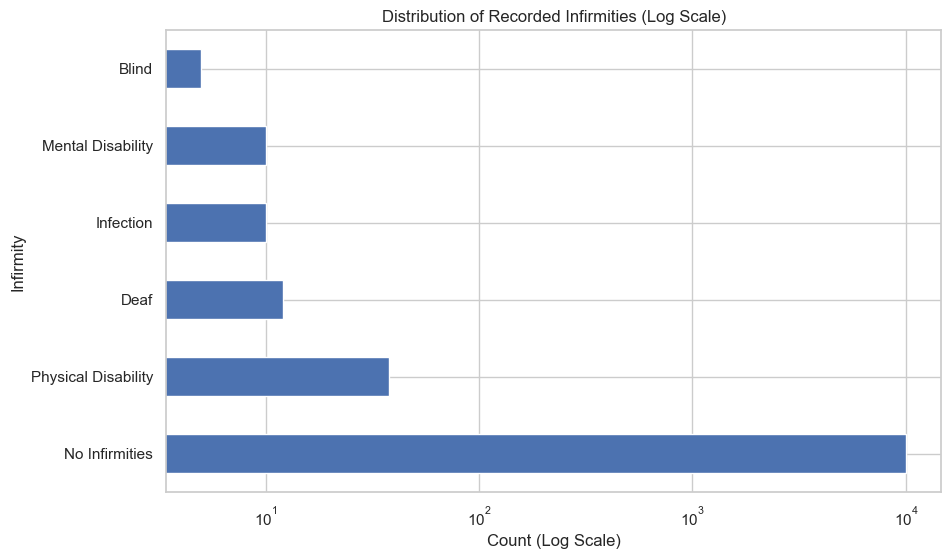

In [34]:
# Assuming 'Infirmity' is the column indicating infirmities
infirmity_distribution = df['Infirmity'].value_counts()
# Plot a horizontal bar chart with a log scale
infirmity_distribution.plot(kind='barh', figsize=(10, 6))
plt.xscale('log')  # Use a logarithmic scale on the x-axis
plt.title('Distribution of Recorded Infirmities (Log Scale)')
plt.xlabel('Count (Log Scale)')
plt.ylabel('Infirmity')
plt.savefig('Distribution of infirmities.png', dpi=300, bbox_inches='tight')
plt.show()


In [35]:
# Finding the median age of all Infirmities  

df[['Infirmity', "Age"]].groupby("Infirmity").median()

,Age
Infirmity,
Blind,28.0
Deaf,29.5
Infection,36.0
Mental Disability,29.5
No Infirmities,34.0
Physical Disability,34.5


### Religion

<function matplotlib.pyplot.show(close=None, block=None)>

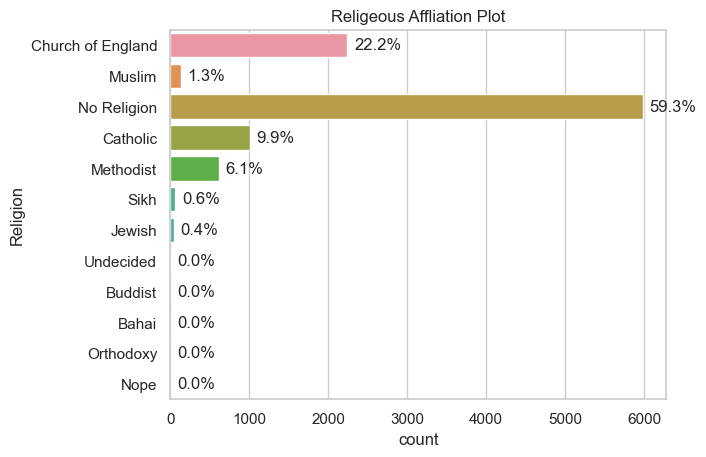

In [36]:
# Create a plot for the religion
religion_countplot = sns.countplot(data=df, y='Religion')

# Get the total frequency of each category
total_frequency = len(df['Religion'])

# Loop through each bar in the plot
for p in religion_countplot.patches:
    # Get the percentage value for the bar
    percentage = p.get_width() / total_frequency * 100
    
    # Add the percentage as text next to the bar
    religion_countplot.annotate(f'{percentage:.1f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), xytext=(5, 0), textcoords='offset points', va='center')

# Give the plot a title and name the y-axis
religion_countplot.set(title='Religeous Affliation Plot')
plt.savefig('Distribution of Religeous Affiliations.png', dpi=300, bbox_inches='tight')
plt.show

In [37]:
(2243/10083) * 100

22.24536348309035

In [38]:
df['Religion'].value_counts()

No Religion          5984
Church of England    2243
Catholic             1003
Methodist             612
Muslim                129
Sikh                   64
Jewish                 41
Undecided               3
Buddist                 1
Bahai                   1
Orthodoxy               1
Nope                    1
Name: Religion, dtype: int64

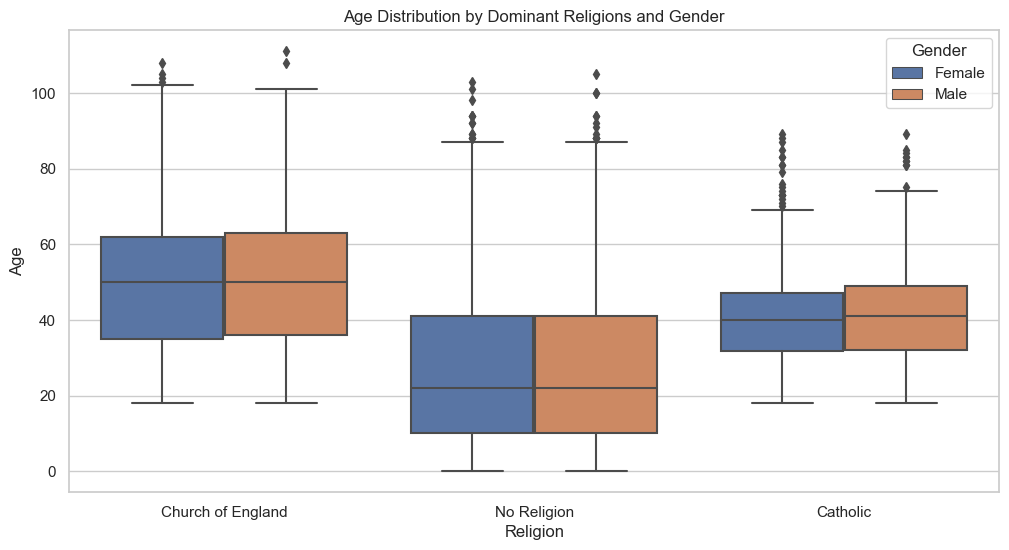

In [39]:
# Identify dominant religions
dominant_religions = df['Religion'].value_counts().index[:3]  

# Filter the dataset for individuals with dominant religions
df_dominant_religions = df[df['Religion'].isin(dominant_religions)]

# Plot age distribution by dominant religions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Religion', y='Age', data=df_dominant_religions, hue='Gender')
plt.title('Age Distribution by Dominant Religions and Gender')
plt.savefig('Distribution of Dominant Religeons by Gender.png', dpi=300)
plt.xlabel('Religion')
plt.ylabel('Age')
plt.show()


In [40]:
# Filter data for individuals with no religious affiliation
non_religious_df = df[df['Religion'] == 'No Religion']

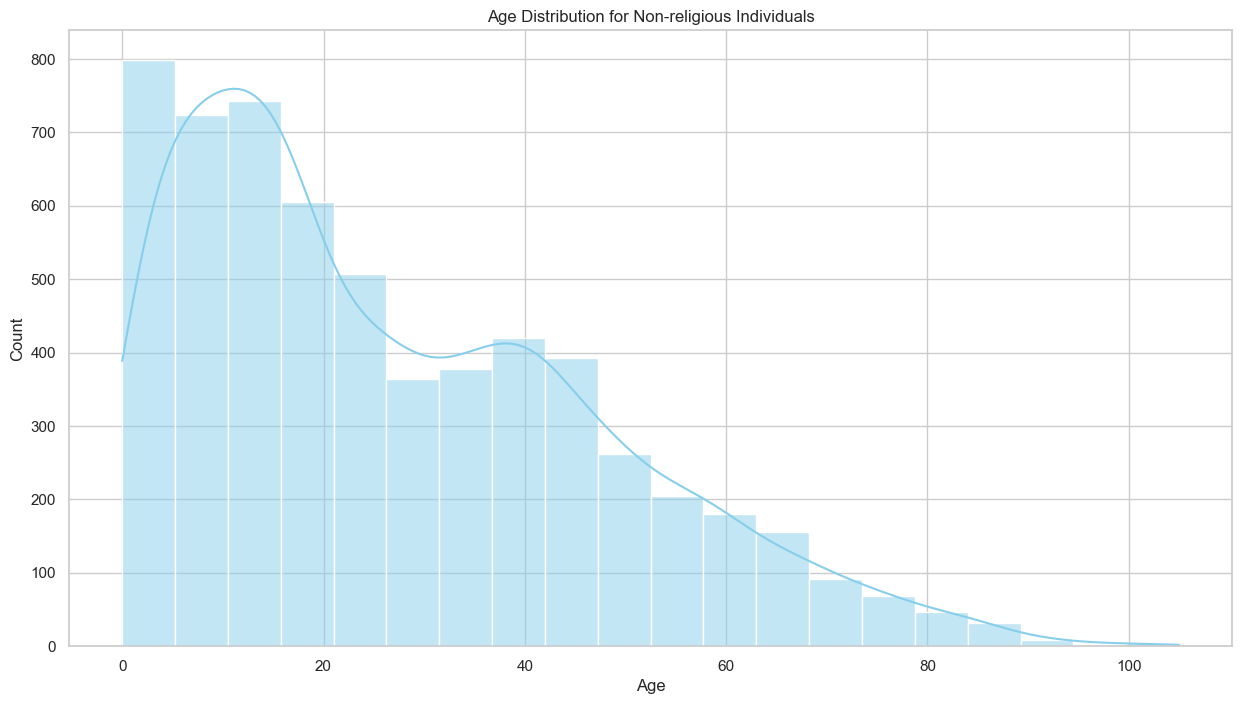

In [41]:
# Explore demographic characteristics
plt.figure(figsize=(15, 8))
sns.histplot(non_religious_df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution for Non-religious Individuals')
plt.savefig('Distribution for Non-religious Individuals.png', dpi=300)
plt.show()

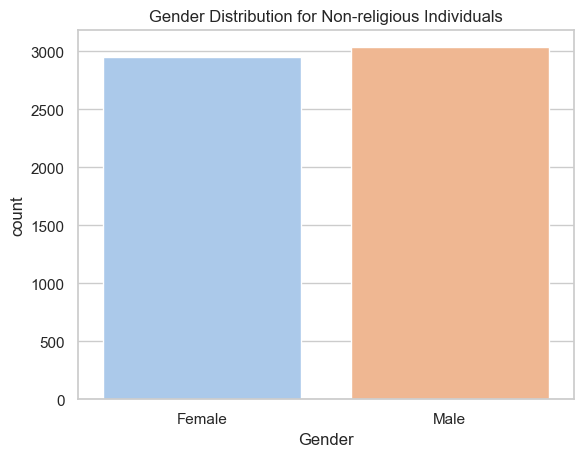

In [42]:
sns.countplot(x='Gender', data=non_religious_df, palette='pastel')
plt.title('Gender Distribution for Non-religious Individuals')
plt.savefig(' Distribution by Non-religious Individuals.png', dpi=300)
plt.show()

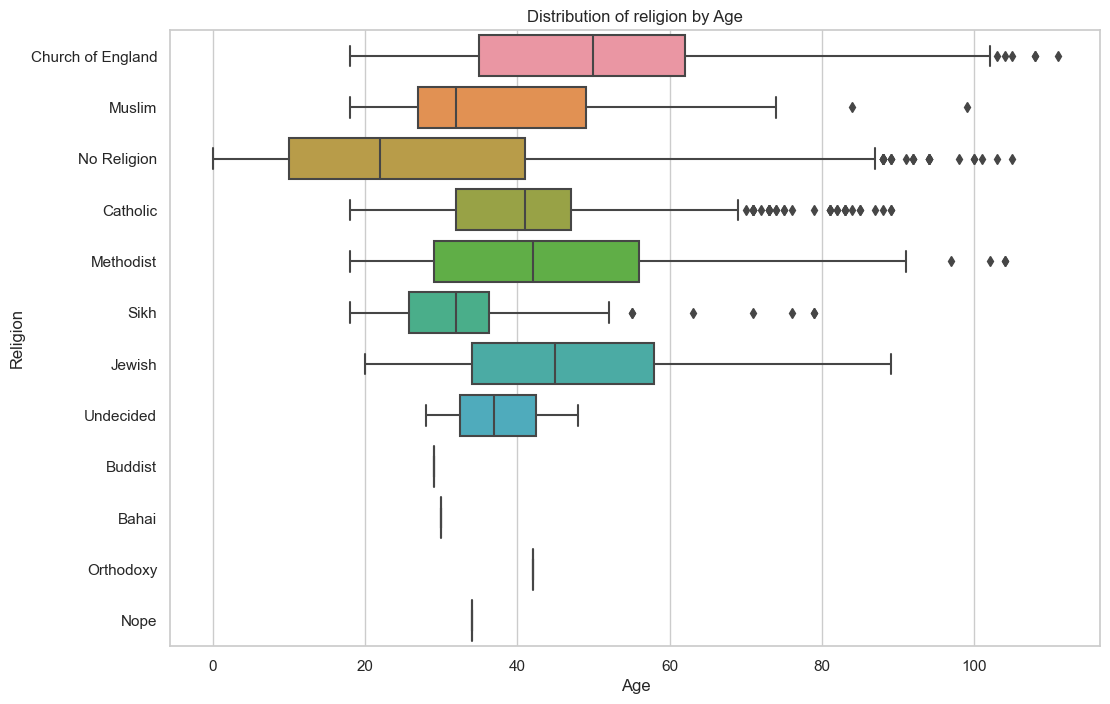

In [43]:
plt.figure(figsize=(12, 8))
plt.title('Distribution of religion by Age')
plt.xlabel('Age')
plt.ylabel('Religion')
sns.boxplot(data=df,y='Religion',x='Age')
plt.savefig(' Distribution of religion by Age.png', dpi=300)
plt.show()

In [44]:
# Group by Religion and calculate mean, median, and mode
grouped_data = df.groupby('Religion')['Age'].agg(['mean', 'median', lambda x: x.mode().iloc[0]]).reset_index()
grouped_data.columns = ['Religion', 'Mean Age', 'Median Age', 'Mode Age']

# Calculate the range of ages
age_range = df.groupby('Religion')['Age'].agg(lambda x: x.max() - x.min()).reset_index()
age_range.columns = ['Religion', 'Age Range']

# Calculate the interquartile range (IQR)
q3 = df.groupby('Religion')['Age'].quantile(0.75).reset_index()
q1 = df.groupby('Religion')['Age'].quantile(0.25).reset_index()
iqr_data = pd.merge(q3, q1, on='Religion', suffixes=('_Q3', '_Q1'))
iqr_data['IQR'] = iqr_data['Age_Q3'] - iqr_data['Age_Q1']
iqr_data.drop(['Age_Q3', 'Age_Q1'], axis=1, inplace=True)

# Merge all the computed statistics
result_df = pd.merge(grouped_data, age_range, on='Religion')
result_df = pd.merge(result_df, iqr_data, on='Religion')

# Display the results
print(result_df)


             Religion   Mean Age  Median Age  Mode Age  Age Range   IQR
0               Bahai  30.000000        30.0        30          0   0.0
1             Buddist  29.000000        29.0        29          0   0.0
2            Catholic  41.005982        41.0        47         71  15.0
3   Church of England  49.344182        50.0        36         93  27.0
4              Jewish  48.829268        45.0        44         69  24.0
5           Methodist  43.740196        42.0        26         86  27.0
6              Muslim  38.294574        32.0        28         81  22.0
7         No Religion  27.098763        22.0        14        105  31.0
8                Nope  34.000000        34.0        34          0   0.0
9           Orthodoxy  42.000000        42.0        42          0   0.0
10               Sikh  34.953125        32.0        34         61  10.5
11          Undecided  37.666667        37.0        28         20  10.0


## POPULATION GROWTH

### IMMIGRATION

In [45]:
immigrants = df[df['Relationship to Head of House']=='Lodger']

In [46]:
len(immigrants)

1267

In [47]:
rate_of_migration = round((len(immigrants)/df.shape[0]),4)

In [48]:
rate_of_migration

0.1257

### EMMIGRATION

In [49]:
male_divorcee = df[(df['Marital Status']== 'Divorced')  & (df['Gender']=='Male')]

In [50]:
len(male_divorcee)

393

In [51]:
female_divorcee = df[(df['Marital Status']== 'Divorced')  & (df['Gender']=='Female')]

In [52]:
len(female_divorcee)

579

In [53]:
Emigrants =len(female_divorcee) -len(male_divorcee)

In [54]:
Emigrants

186

In [55]:
rate_of_emigration =round((Emigrants/df.shape[0]),4)

In [56]:
rate_of_emigration

0.0184

In [57]:
Net_migration = rate_of_migration - rate_of_emigration

In [58]:
print('The net migration is :', Net_migration )

The net migration is : 0.1073


### Birth Rate Calculation

In [59]:
children_age_0 = df[df['Age'] == 0]

In [60]:
crude_birth_rate =round( (len(children_age_0)/df.shape[0])*1000,4)

In [61]:
crude_birth_rate

12.5955

### Death Rate Calculation

In [62]:
# Assuming you have a DataFrame named 'df' with an 'Age' column

# Define age brackets (customize as needed)

age_brackets = [(60, 64), (65, 69), (70, 74), (75, 79), (80, 84), (85, 89), (90, 94), (95, 99), (100, 104), (105, 109), (110, 114)]
 
# Initialize a dictionary to store results

death_rates = {'Age Comparison': [], 'Death Rate per Annum': []}
 
# Iterate over age brackets and compute death rates

for i in range(len(age_brackets) - 1):

    start_age, end_age = age_brackets[i]

    next_age_bracket = age_brackets[i + 1]
 
    current_age_group = df[(df['Age'] >= start_age) & (df['Age'] <= end_age)]

    next_age_group = df[(df['Age'] >= next_age_bracket[0]) & (df['Age'] <= next_age_bracket[1])]
 
    # Assume the number of people in each generation was the same when they were the same age

    count_current_age_group = len(current_age_group)

    count_next_age_group = len(next_age_group)
 
    # Compute the differential over a 5-year period

    differential = count_current_age_group - count_next_age_group
 
    # Compute the death rate per annum (assuming a 5-year period)

    death_rate_per_annum = differential / 5
 
    # Store the result in the dictionary

    age_comparison = f'{start_age}-{end_age} vs {next_age_bracket[0]}-{next_age_bracket[1]}'

    death_rates['Age Comparison'].append(age_comparison)

    death_rates['Death Rate per Annum'].append(death_rate_per_annum)
# Create a DataFrame from the dictionary

result_df = pd.DataFrame(death_rates)
 
# Display the result

print(result_df)


       Age Comparison  Death Rate per Annum
0      60-64 vs 65-69                  29.4
1      65-69 vs 70-74                   9.8
2      70-74 vs 75-79                  19.4
3      75-79 vs 80-84                   7.6
4      80-84 vs 85-89                  11.8
5      85-89 vs 90-94                   9.6
6      90-94 vs 95-99                   2.0
7    95-99 vs 100-104                  -0.2
8  100-104 vs 105-109                   1.6
9  105-109 vs 110-114                   0.6


In [63]:
# Calculate the death rate

total_death_rate = (sum(death_rates['Death Rate per Annum']) / df.shape[0]) * 1000
 
# Display the total death rate

print(f'Total Death Rate per 1000: {total_death_rate:.4f}')

Total Death Rate per 1000: 9.0846


In [64]:
Population_growth = round(((crude_birth_rate + rate_of_migration)-(total_death_rate +rate_of_emigration))*0.1,4)

In [65]:
Population_growth = round(((crude_birth_rate-total_death_rate) +Net_migration)*0.1,4)

In [66]:
print('The population growth rate is: ',Population_growth, '%')

The population growth rate is:  0.3618 %


### OCCUPANCY

In [67]:
# Group by 'House Number' and 'Street' and calculate the occupancy rate
occupancy_rate_df = df.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy Count')
 
# Display the occupancy_rate_df DataFrame
print(occupancy_rate_df)

      House Number            Street  Occupancy Count
0                1       Abbott Mall                4
1                1        Acorn Road                4
2                1       Adams Ports                5
3                1        Ahmed Oval                3
4                1    Andrews Avenue                2
...            ...               ...              ...
3100           225  Lightning Street                4
3101           226  Lightning Street                5
3102           227  Lightning Street                8
3103           228  Lightning Street                5
3104           229  Lightning Street                1

[3105 rows x 3 columns]


In [68]:
num_houses = occupancy_rate_df.shape[0]
num_houses

3105

In [69]:
mean=occupancy_rate_df ['Occupancy Count'].mean()
print(f"The average occupancy count {mean:.0f}")

The average occupancy count 3


In [70]:
# Number of houses whose occupant are less than or equal to the average occupant

occupant_less_than_3 = occupancy_rate_df [occupancy_rate_df ['Occupancy Count']<= 3].shape[0]
 
print(f"The Occupant less than or equal to 3 is {occupant_less_than_3:.0f}")

The Occupant less than or equal to 3 is 1977


In [71]:
# Percentage of houses greater than average occupant
underpopulated_houses = (occupant_less_than_3/num_houses)*100
 
print(f"The percentage of houses under-used are: {underpopulated_houses:.0f}%")

The percentage of houses under-used are: 64%


In [72]:
# Number of houses whose occupant are greater than average occupant

occupant_greater_than_3 = occupancy_rate_df[occupancy_rate_df['Occupancy Count']> 3].shape[0]
 
print(f"The Occupant greater than 3 is {occupant_greater_than_3:.0f}")

The Occupant greater than 3 is 1128


In [73]:
# Percentage of houses greater than average occupant
overpopulated = (occupant_greater_than_3/num_houses)*100
 
print(f"The percentage of houses over-used are: {overpopulated:.0f}%")

The percentage of houses over-used are: 36%


## COMMUTERS

In [74]:

commuter_occupations = [

    'Academic librarian', 'Accountant, chartered', 'Accountant', 'chartered certified', 'Accountant', 'chartered management',

    'Accountant', 'chartered public finance', 'Advertising account executive', 'Advertising account planner', 'Advertising art director',

    'Advertising copywriter', 'Aeronautical engineer', 'Aid worker', 'Air cabin crew', 'Air traffic controller', 'Airline pilot',

    'Analytical chemist', 'Armed forces logistics/support/administrative officer', 'Armed forces operational officer',

    'Armed forces technical officer', 'Armed forces training and education officer', 'Biochemist, clinical', 'Biomedical engineer',

    'Chief Executive Officer', 'Chief Financial Officer', 'Chief Marketing Officer', 'Chief Operating Officer', 'Chief Strategy Officer',

    'Chief Technology Officer', 'Civil engineer, consulting', 'Civil engineer, contracting', 'Civil Service administrator',

    'Civil Service fast streamer', 'Clinical embryologist', 'Clinical molecular geneticist', 'Data processing manager', 'Data scientist',

    'Database administrator', 'Economist', 'Financial planner', 'Financial risk analyst', 'Financial trader', 'Geochemist',

    'Geographical information systems officer', 'Geologist, engineering', 'Geologist, wellsite', 'Geophysical data processor',

    'Geophysicist/field seismologist', 'Geoscientist', 'Haematologist', 'Interpreter', 'Investment analyst', 'Investment banker, corporate',

    'Investment banker, operational', 'IT consultant', 'IT sales professional', 'IT technical support officer', 'IT trainer',

    'Magazine features editor', 'Magazine journalist', 'Multimedia programmer', 'Oncologist', 'Ophthalmologist', 'PhD Student',

    'Professor Emeritus', 'Psychiatrist', 'Research officer, government', 'Research officer, political party', 'Research officer, trade union',

    'Research scientist (life sciences)', 'Research scientist (maths)', 'Research scientist (medical)', 'Research scientist (physical sciences)',

    'Retail banker', 'Retail manager', 'Retail merchandiser', 'Sales executive', 'Sales professional, IT', 'Science writer',

    'Scientific laboratory technician', 'Scientist, audiological', 'Scientist, biomedical', 'Scientist, clinical (histocompatibility and immunogenetics)',

    'Scientist, forensic', 'Scientist, marine', 'Scientist, physiological', 'Scientist, product/process development',

    'Scientist, research (life sciences)', 'Scientist, research (maths)', 'Scientist, research (medical)', 'Scientist, research (physical sciences)',

    'Scientist, water quality', 'Surgeon', 'Systems analyst', 'Systems developer', 'Tree surgeon', 'University Student'

]
 
# Filter DataFrame to include only rows where the occupation is in the list of commuter occupations

commuter_df = df[df['Occupation'].isin(commuter_occupations)]
 
# Display the resulting DataFrame

print(commuter_df)


       Unnamed: 0  House Number                 Street First Name  \
1               1             2           Gray Centers      Amber   
45             45            10    Bletchleyrow Street     Amelia   
63             63            14    Bletchleyrow Street      Abdul   
64             64            14    Bletchleyrow Street       Kyle   
71             71            15    Bletchleyrow Street      Helen   
...           ...           ...                    ...        ...   
10012       10012             1     Burgess Obervatory     Louise   
10060       10060             1            Baker Spire     Teresa   
10066       10066             1  St.Matthew Manorhouse      Lewis   
10074       10074             1     Canterbury Factory       Joel   
10077       10077             1     Canterbury Factory       Jill   

              Surname  Age Relationship to Head of House Marital Status  \
1               James   21                          Head         Single   
45             Robson

In [75]:
# Total number of commuters
number_of_commuters = commuter_df.shape[0]
print('The total number of commuters is',number_of_commuters)

The total number of commuters is 637


In [76]:
# percentage of commuters to total population
Percentage_commuters =round((number_of_commuters/df.shape[0])*100,4)
print('The percentage of population that commute to work is ',Percentage_commuters,'%' )

The percentage of population that commute to work is  6.3176 %


In [77]:
df['Infirmity'].value_counts()

No Infirmities         10008
Physical Disability       38
Deaf                      12
Infection                 10
Mental Disability         10
Blind                      5
Name: Infirmity, dtype: int64